In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits import mplot3d

In [2]:
r = pd.read_csv("../output/r.csv", header=None)
annual_step = 52 # weekly
weeks_quarter = 13 # weeks every quarter
r

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0,0.018079,0.018206,0.018577,0.017954,0.021205,0.019222,0.018779,0.020336,0.019329,...,-0.206472,-0.204465,-0.142165,-0.176347,-0.144470,-0.115709,-0.134767,-0.099942,-0.121620,-0.108338
1,0,0.018079,0.017813,0.017586,0.017592,0.018790,0.018967,0.016390,0.014989,0.014121,...,0.196725,0.163801,0.182450,0.179124,0.128714,0.096844,0.063336,0.029130,0.034280,-0.047029
2,0,0.018079,0.018264,0.019509,0.019509,0.018316,0.016401,0.014222,0.014017,0.011415,...,0.230912,0.229877,0.254073,0.254742,0.250429,0.272625,0.291162,0.264143,0.326667,0.332037
3,0,0.018079,0.017907,0.018033,0.018318,0.017767,0.019699,0.021494,0.022672,0.022434,...,0.015648,-0.011715,-0.011078,-0.005085,0.004128,0.049272,0.045176,0.041772,0.002629,0.035175
4,0,0.018079,0.018051,0.016894,0.016523,0.017442,0.019295,0.019363,0.019640,0.015582,...,0.292343,0.285107,0.264771,0.251154,0.237252,0.234787,0.213925,0.238933,0.202415,0.192422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.018079,0.018271,0.017837,0.017157,0.018538,0.019944,0.023100,0.024619,0.026678,...,0.183074,0.190871,0.187437,0.160380,0.164046,0.154456,0.113561,0.145445,0.145054,0.183989
96,0,0.018079,0.018068,0.017610,0.017287,0.017210,0.016297,0.014262,0.014891,0.014638,...,0.165858,0.181285,0.180758,0.180207,0.140223,0.146660,0.160723,0.183668,0.173636,0.164841
97,0,0.018079,0.017804,0.016901,0.016693,0.016163,0.016465,0.017297,0.019810,0.019560,...,-0.042688,-0.064560,-0.098420,-0.094773,-0.080370,-0.059339,-0.027981,-0.052278,-0.063615,-0.030731
98,0,0.018079,0.017830,0.018219,0.018160,0.018149,0.018482,0.021848,0.017488,0.016436,...,0.011795,0.036409,0.045996,0.078456,0.102697,0.128958,0.157643,0.171629,0.156418,0.196536


In [3]:
with open('../output/computedVol.json') as f:
    computed_vol = json.load(f)
with open('../data/swaption_vol.json') as f:
    market_vol = json.load(f)

min_quote = min(min(computed_vol['quote']), min(market_vol['quote']))*1e4
max_quote = max(max(computed_vol['quote']), max(market_vol['quote']))*1e4

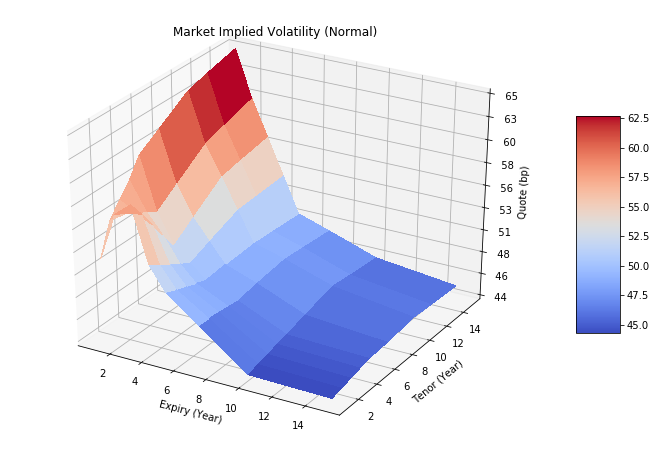

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))
X = market_vol['expiry']
Y = market_vol['tenor']
# X = market_vol['tenor']
# Y = market_vol['expiry']
X, Y = np.meshgrid(X, Y) # shape =  len(Y), len(x)
Z_market = np.array(market_vol['quote']).reshape(market_vol['expiry_size'], market_vol['tenor_size'], order='C')
# Z = np.array(market_vol['quote']).reshape(market_vol['tenor_size'], market_vol['expiry_size'])
Z_market = Z_market.transpose()
Z_market *= 1e4 # (bp)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z_market, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(Z_market.min(), Z_market.max())
# ax.set_zlim(min_quote, max_quote)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%4.0d'))
ax.set_xlabel('Expiry (Year)')
ax.set_ylabel('Tenor (Year)')
ax.set_zlabel('Quote (bp)')
ax.set_title('Market Implied Volatility (Normal)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


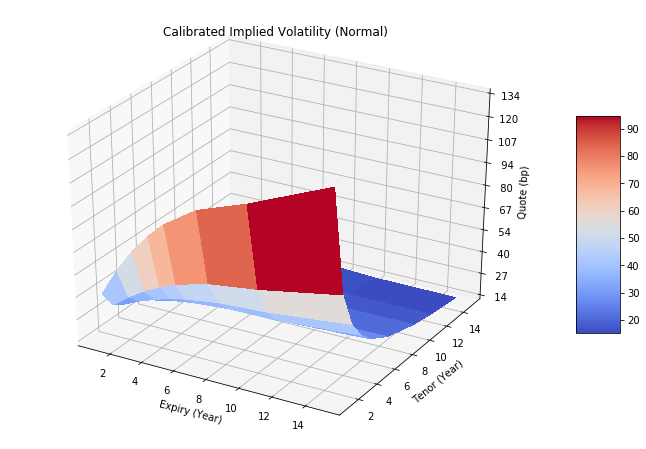

In [5]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))
X = computed_vol['expiry']
Y = computed_vol['tenor']
# X = computed_vol['tenor']
# Y = computed_vol['expiry']
X, Y = np.meshgrid(X, Y) # shape =  len(Y), len(x)
Z_computed = np.array(computed_vol['quote']).reshape(computed_vol['expiry_size'], computed_vol['tenor_size'], order='C')
# Z = np.array(computed_vol['quote']).reshape(computed_vol['tenor_size'], computed_vol['expiry_size'])
Z_computed = Z_computed.transpose()
Z_computed *= 1e4 # (bp)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z_computed, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(Z_computed.min(), Z_computed.max())
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%4.0d'))
ax.set_xlabel('Expiry (Year)')
ax.set_ylabel('Tenor (Year)')
ax.set_zlabel('Quote (bp)')
ax.set_title('Calibrated Implied Volatility (Normal)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


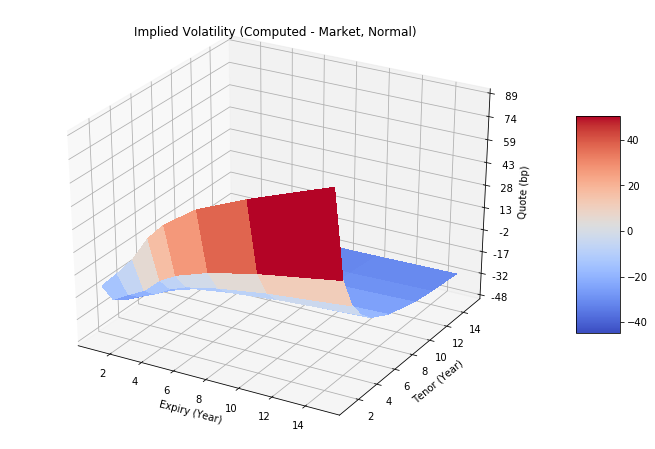

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 8))
dz = Z_computed - Z_market
# Plot the surface.
surf = ax.plot_surface(X, Y, dz, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(dz.min(), dz.max())
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%4.0d'))
ax.set_xlabel('Expiry (Year)')
ax.set_ylabel('Tenor (Year)')
ax.set_zlabel('Quote (bp)')
ax.set_title('Implied Volatility (Computed - Market, Normal)')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


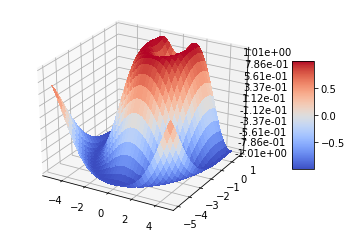

In [7]:
# 3D plot example



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 1, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%1.2e'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


In [8]:
market_vol

{'expiry_size': 8,
 'tenor_size': 9,
 'expiry': [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 15.0],
 'tenor': [1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 12.0, 15.0],
 'quote': [0.005269650941616,
  0.00559415455899,
  0.005738775816108,
  0.005875295283538,
  0.006067420038874,
  0.006206746498912,
  0.006415176094446,
  0.00647684397967,
  0.006557024784882,
  0.005769887459108,
  0.005710218772324,
  0.005650703692152,
  0.005589420313622,
  0.005526759736926,
  0.005680360086114,
  0.00590730666199,
  0.005978311091448,
  0.00607447452642,
  0.005907281807064,
  0.005743863467652,
  0.005562993588878,
  0.00538347162027,
  0.005209627317916,
  0.0053666828152,
  0.005595134555694,
  0.00563898078588,
  0.005695367382838,
  0.00533297878553,
  0.005262515927202,
  0.005190630309164,
  0.005126512439268,
  0.005060993971176,
  0.005151599808102,
  0.00527791195158,
  0.005292957111618,
  0.005312374655728,
  0.005080751846114,
  0.00503604138651,
  0.004995580408964,
  0.004951553929508,
  0.004909

In [9]:
Z

array([[ 0.70886129,  0.57562789,  0.42921793,  0.27541086,  0.11965158,
        -0.03317922, -0.17893857, -0.31433407, -0.43697552, -0.54536893,
        -0.63885987, -0.7175353 , -0.7820949 , -0.83370323, -0.87383376,
        -0.90411471, -0.92618484, -0.94156548, -0.95155293, -0.9571338 ,
        -0.95892427, -0.9571338 , -0.95155293, -0.94156548, -0.92618484,
        -0.90411471, -0.87383376, -0.83370323, -0.7820949 , -0.7175353 ,
        -0.63885987, -0.54536893, -0.43697552, -0.31433407, -0.17893857,
        -0.03317922,  0.11965158,  0.27541086,  0.42921793,  0.57562789],
       [ 0.57562789,  0.4208019 ,  0.2570234 ,  0.09046523, -0.07324847,
        -0.22926849, -0.37368016, -0.50359342, -0.61716461, -0.71355591,
        -0.79284159, -0.85587291, -0.90411471, -0.9394669 , -0.96408345,
        -0.98019913, -0.98997268, -0.99535163, -0.99796201, -0.99902398,
        -0.99929279, -0.99902398, -0.99796201, -0.99535163, -0.98997268,
        -0.98019913, -0.96408345, -0.9394669 , -0.

In [10]:
Y[[0,1]]

array([[-5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  ,
        -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  ,
        -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  ,
        -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  , -5.  ,
        -5.  , -5.  , -5.  , -5.  ],
       [-4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75,
        -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75,
        -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75,
        -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75, -4.75,
        -4.75, -4.75, -4.75, -4.75]])

In [11]:
np.sqrt(25+4.75**2)

6.896557112066861

In [12]:
np.sqrt(5**2 + 4.75**2)

6.896557112066861

In [13]:
R.shape # (Y,X)

(24, 40)